In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [2]:
rawData = pd.read_csv('CreditOne.csv',index_col=0)
rawData.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30202
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30000 non-null  int64
 1   LIMIT_BAL                               30000 non-null  int64
 2   MARRIAGE                                30000 non-null  int64
 3   AGE                                     30000 non-null  int64
 4   PAY_1                                   30000 non-null  int64
 5   PAY_2                                   30000 non-null  int64
 6   PAY_3                                   30000 non-null  int64
 7   PAY_4                                   30000 non-null  int64
 8   PAY_5                                   30000 non-null  int64
 9   PAY_6                                   30000 non-null  int64
 10  BILL_AMT1                               30000 non-null  int64
 11  BILL_AMT2      

In [4]:
X_1=rawData.drop('LIMIT_BAL', axis=1)
y_1=rawData['LIMIT_BAL']

(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

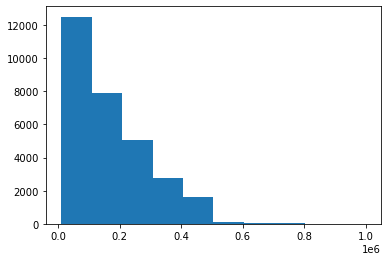

In [5]:
y_1 = rawData['LIMIT_BAL']
plt.hist(y_1)

In [6]:
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

# X_train[:10]


In [7]:
#X = rawData.iloc[:,10:31]
#print('Summary of feature sample')
#X.head()

In [8]:
model = LinearRegression(n_jobs=10)

In [9]:
print(y_1)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
30198    220000
30199    150000
30200     30000
30201     80000
30202     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [10]:
print(cross_val_score(model, X_1, y_1, cv=3)) 

[0.35568359 0.3804519  0.33459622]


In [11]:
algo = RandomForestRegressor()
algo.fit(X_1,y_1)
importance=algo.feature_importances_

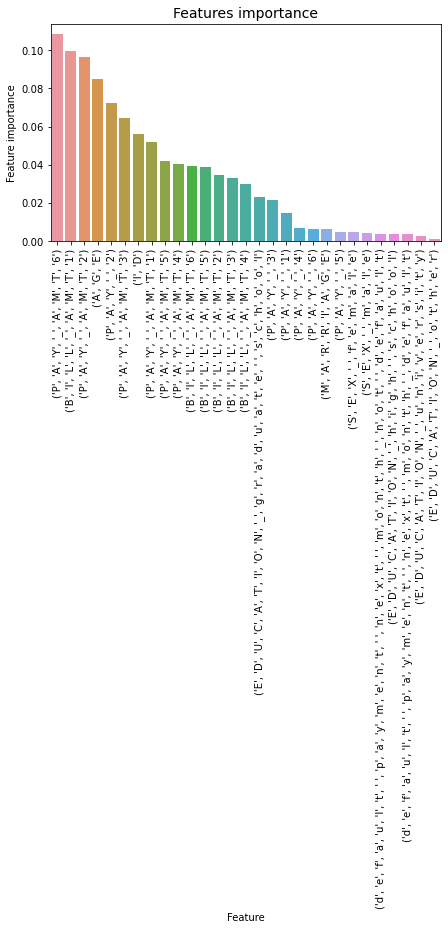

In [35]:
tmp = pd.DataFrame({'Feature': X_1, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.savefig('Features Importance_Limit Balance', transparent=True, bbox_inches='tight')
plt.show()


In [13]:
header = rawData.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


In [14]:
Data=rawData.drop(columns=['ID', 'MARRIAGE', 'PAY_1', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'SEX_female',
       'SEX_male', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university'])


In [15]:
Data.head()

,LIMIT_BAL,AGE,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_graduate school,default payment next month_default,default payment next month_not default
0,20000,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0,0,1,0
1,120000,26,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,1,0
2,90000,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1
3,50000,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1
4,50000,57,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1


In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30202
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   LIMIT_BAL                               30000 non-null  int64
 1   AGE                                     30000 non-null  int64
 2   PAY_2                                   30000 non-null  int64
 3   BILL_AMT1                               30000 non-null  int64
 4   BILL_AMT2                               30000 non-null  int64
 5   BILL_AMT3                               30000 non-null  int64
 6   BILL_AMT4                               30000 non-null  int64
 7   BILL_AMT5                               30000 non-null  int64
 8   BILL_AMT6                               30000 non-null  int64
 9   PAY_AMT1                                30000 non-null  int64
 10  PAY_AMT2                                30000 non-null  int64
 11  PAY_AMT3       

In [17]:
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine import discretisers as dsc

In [18]:
X=Data.drop('LIMIT_BAL', axis=1)
y=Data['LIMIT_BAL']

In [19]:
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
30198    220000
30199    150000
30200     30000
30201     80000
30202     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [21]:
print(y_test)

25868     40000
16667     80000
22589    170000
10352    200000
8932      50000
          ...  
10684    420000
1892      50000
7573     330000
4811     160000
28677     80000
Name: LIMIT_BAL, Length: 7500, dtype: int64


In [22]:
disc = dsc.EqualFrequencyDiscretiser(q=10, variables=['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [23]:
disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['AGE', 'BILL_AMT1', 'BILL_AMT2',
                                     'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                     'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                     'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                     'PAY_AMT6'])

In [24]:
X_train_D= disc.transform(X_train)
X_test_D= disc.transform(X_test)

In [25]:
X_train_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 16298 to 20169
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   AGE                                     22500 non-null  int64
 1   PAY_2                                   22500 non-null  int64
 2   BILL_AMT1                               22500 non-null  int64
 3   BILL_AMT2                               22500 non-null  int64
 4   BILL_AMT3                               22500 non-null  int64
 5   BILL_AMT4                               22500 non-null  int64
 6   BILL_AMT5                               22500 non-null  int64
 7   BILL_AMT6                               22500 non-null  int64
 8   PAY_AMT1                                22500 non-null  int64
 9   PAY_AMT2                                22500 non-null  int64
 10  PAY_AMT3                                22500 non-null  int64
 11  PAY_AMT4   

In [26]:
from sklearn import preprocessing

In [27]:
X_train_scaled = preprocessing.scale(X_train_D)
X_test_scaled=preprocessing.scale(X_test_D)

In [28]:
algoRF=RandomForestRegressor()
modelRF=algoRF.fit(X_train_scaled,y_train)

In [29]:
predictions = modelRF.predict(X_test_scaled)
print(predictions)

[164400.          82073.33333333 229100.         ... 205120.
 164800.          78600.        ]


In [30]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print(rmse)

96834.63325952391


In [31]:
predRsquared = r2_score(y_test,predictions)
print(predRsquared)

0.43249306897991247


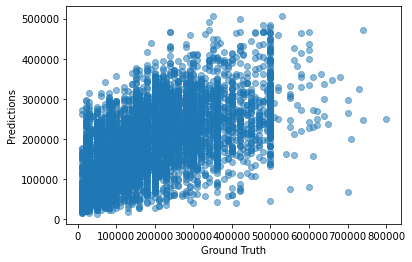

In [33]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

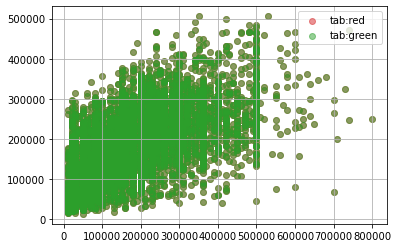

In [34]:
fig, ax = plt.subplots()
for color in ['tab:red', 'tab:green']:
        ax.scatter(y_test, predictions, c=color, label=color,
               alpha=0.5)

ax.legend()
ax.grid(True)

plt.show()